# Pre-Class 10.1

## Exercise 8
Random walk with a drift

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [11]:
def random_walk(n_steps=30):
    position = 0
    path = [position]
    prob_right = 0.6
    for i in range(n_steps):
        if random.uniform(0, 1) < prob_right:
            position += 1
        else:
            position -= 1
        path.append(position)
    return path
        
path = random_walk()
print(path)

[0, -1, 0, -1, -2, -3, -4, -5, -6, -5, -4, -3, -4, -5, -4, -3, -2, -3, -4, -3, -4, -5, -6, -5, -4, -3, -2, -1, 0, 1, 0]


In [27]:
sampled_paths = []

for _ in range(200):
    sampled_paths.append(random_walk()[-1])

Mean: 6.03
Variance: 32.659099999999995


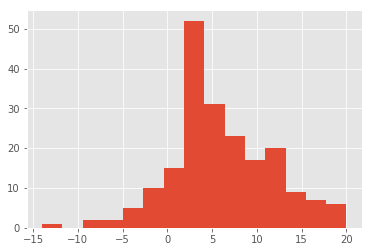

In [29]:
print("Mean: {m}".format(m=np.mean(sampled_paths)))
print("Variance: {m}".format(m=np.var(sampled_paths)))
plt.hist(sampled_paths, bins=15)
plt.show()

## Exercise 9
Gambler's ruin with time limits

In [2]:
def gambler(n_steps=10**7):
    R = np.zeros(2 * 10**7)
#     i = 0
    R[0] = 100
    prob_win = 0.5

    for i in range(1, n_steps):
        if random.uniform(0, 1) < prob_win:
            R[i] = R[i-1] + 1
        else:
            R[i] = R[i-1] - 1
        if (R[i] <= 0 or R[i] > 2100):
            break
    return i, R[i]

In [3]:
%%time
time_bounds = np.linspace(100, 10**7, 10)
times_for_all = []
wins_for_all = []

for i in range(len(time_bounds)):
    times = []
    wins = []
    for _ in range(50):
        t, w = gambler(n_steps=int(time_bounds[i]))
        times.append(t)
        wins.append(w)
    times_for_all.append(times)
    wins_for_all.append(wins)
# gambler()

CPU times: user 1min 55s, sys: 954 ms, total: 1min 56s
Wall time: 2min


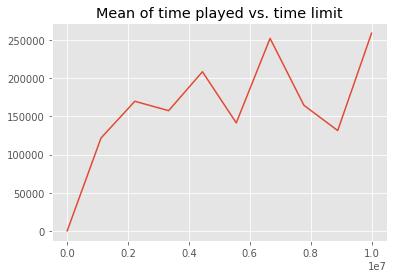

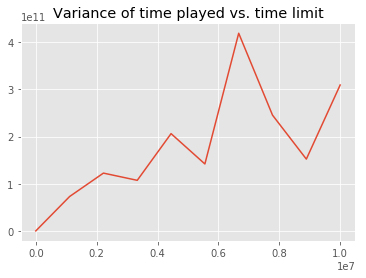

In [8]:
times_for_all = np.array(times_for_all)
wins_for_all = np.array(wins_for_all)



# print(times_for_all)
# print(wins)
# time_bounds[i]

plt.plot(time_bounds, np.mean(times_for_all, axis=1))
plt.title("Mean of time played vs. time limit")
plt.show()
plt.plot(time_bounds, np.var(times_for_all, axis=1))
plt.title("Variance of time played vs. time limit")
plt.show()